In [3]:
import importlib

import numpy as np
from scipy import sparse as ss
import pandas as pd
import anndata

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from rich import print as rprint
from rich.traceback import install
install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f531b732e20>>

In [2]:
import pipeline
pipeline = importlib.reload(pipeline)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-2-de4a129a2d3e>:2 in <module>                                              │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'importlib' is not defined

## Brain

In [31]:
DATA_DIR = '/home/tiankang/wusuowei/data/single_cell/MARS/scRNAseq_Benchmark_datasets/Inter-dataset/Brain/cached/'

In [5]:
for file_name in [
    '/home/tiankang/wusuowei/data/single_cell/MARS/scRNAseq_Benchmark_datasets/Inter-dataset/Brain/MouseALM_HumanMTG/MouseALM_HumanMTG.csv',
    '/home/tiankang/wusuowei/data/single_cell/MARS/scRNAseq_Benchmark_datasets/Inter-dataset/Brain/MouseV1_HumanMTG/MouseV1_HumanMTG.csv',
    '/home/tiankang/wusuowei/data/single_cell/MARS/scRNAseq_Benchmark_datasets/Inter-dataset/Brain/MouseV1_MouseALM/MouseV1_MouseALM.csv',
    '/home/tiankang/wusuowei/data/single_cell/MARS/scRNAseq_Benchmark_datasets/Inter-dataset/Brain/MouseV1_MouseALM_HumanMTG/MouseV1_MouseALM_HumanMTG.csv',
]:
    with open(file_name) as f:
        for line in f:
            print(len(line.split(',')))
            break

16069

16085

41719

16025

(14055, 16025)
Median: 1581891.0
(8128, 16025)
Median: 1930245.5
(12552, 16024)
Median: 1805513.5


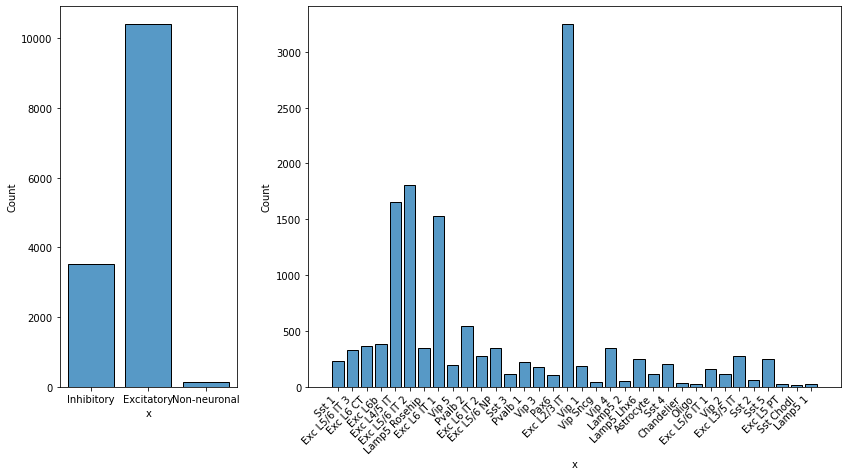

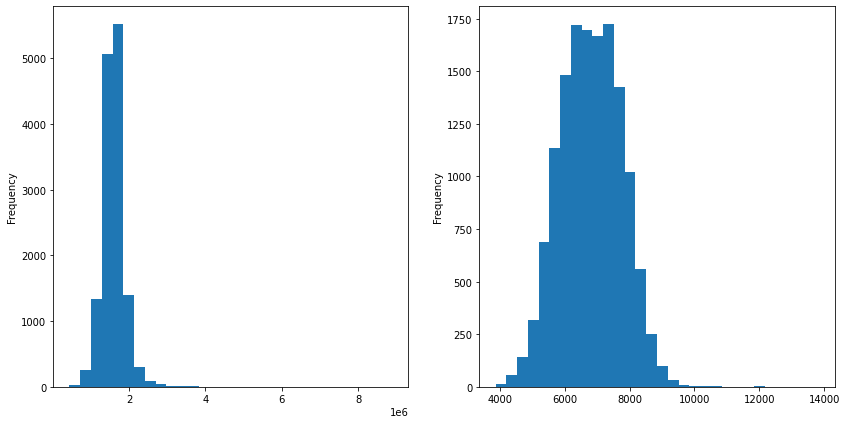

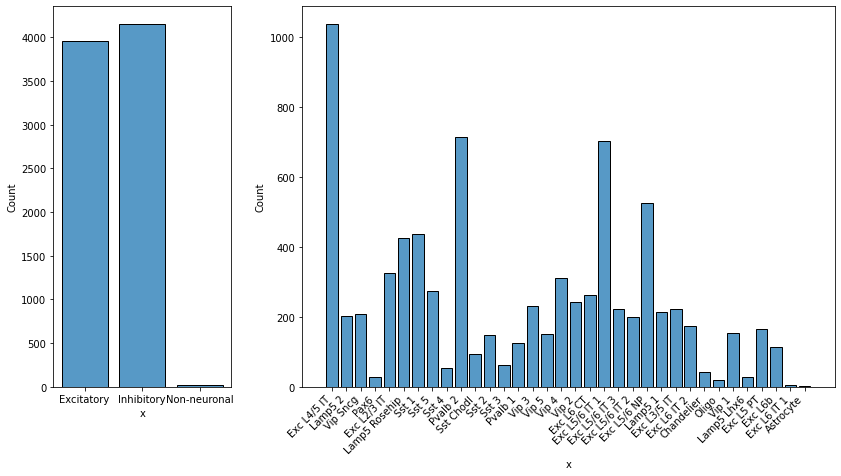

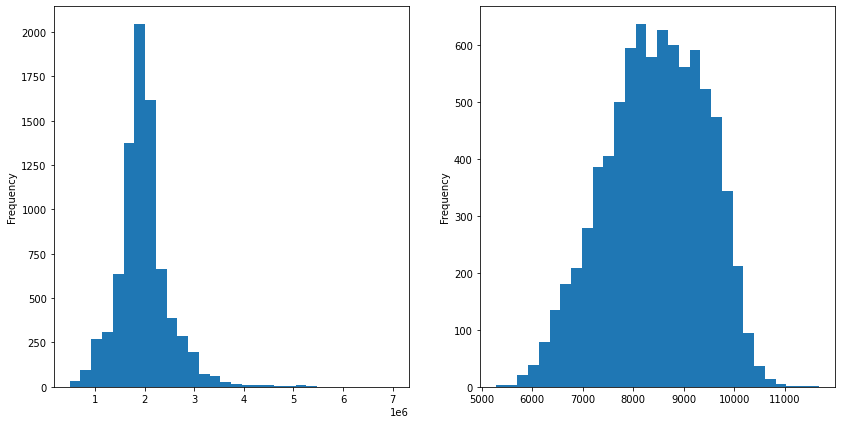

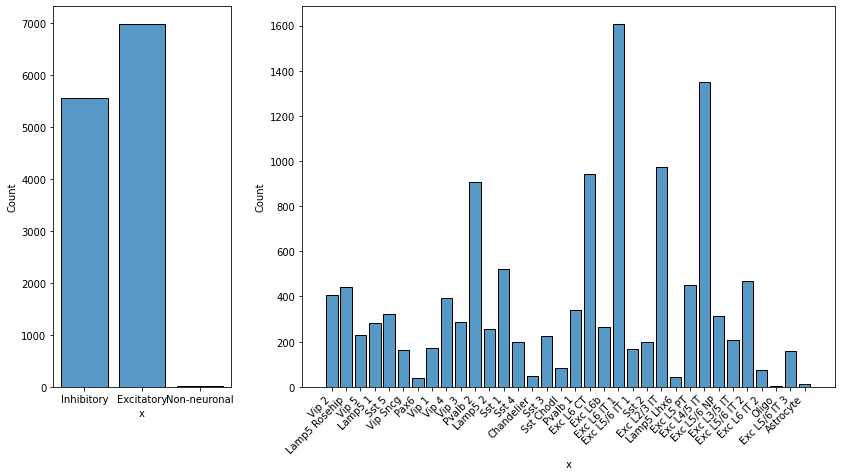

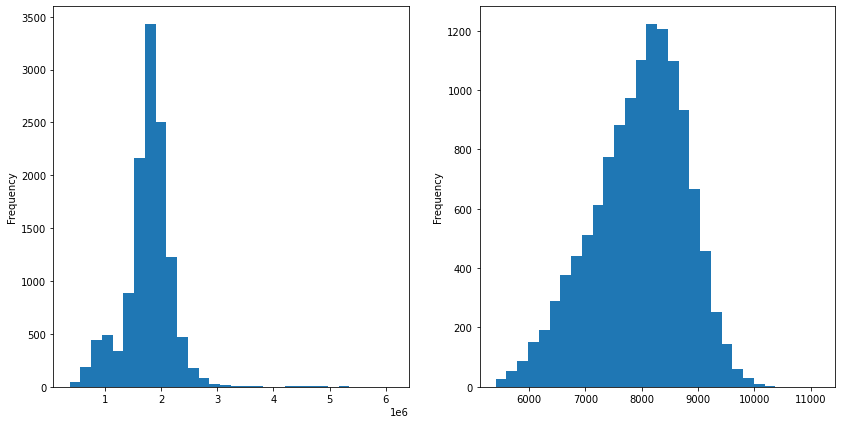

In [8]:
for NAME in ['HumanMTG', 'MouseALM', 'MouseV1']:
    df = pd.read_feather(DATA_DIR + f'{NAME}.feather')
    label_coarse = pd.read_csv(DATA_DIR + f'{NAME}_Label3.csv', squeeze=True)
    label_refined = pd.read_csv(DATA_DIR + f'{NAME}_Label34.csv', squeeze=True)
    # ---- plot label dist ----
    f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(14, 7))
    sns.histplot(data=label_coarse, shrink=.8, ax=ax1)
    g = sns.histplot(data=label_refined, shrink=.8, ax=ax2)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
    )
    plt.savefig(f'./explore/imgs/Brain_{NAME}_label_dist.jpg')
    # ---- plot qc ----
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    df.sum(axis=1).plot(kind='hist', bins=30, ax=ax1)
    (df != 0).sum(axis=1).plot(kind='hist', bins=30, ax=ax2)
    plt.savefig(f'./explore/imgs/Brain_{NAME}_qc.jpg')
    # ---- UMAP ----
    X_normalized = pipeline.normalize(df.values, apply_qc=False)
    umap_object, X_umap = pipeline.umap(X_normalized, n_components=2)
    fig = pipeline.plot(X_umap, backend='plotly')
    fig.write_image(f'./explore/imgs/Brain_{NAME}_noqc_umap.jpg')
    fig = pipeline.plot(X_umap, labels=pipeline.label_to_idx(label_coarse)[0], backend='plotly')
    fig.write_image(f'./explore/imgs/Brain_{NAME}_noqc_umap_coarse.jpg')
    fig = pipeline.plot(X_umap, labels=pipeline.label_to_idx(label_refined)[0], backend='plotly')
    fig.write_image(f'./explore/imgs/Brain_{NAME}_noqc_umap_refined.jpg')


## CellBench

In [32]:
DATA_DIR = '/home/tiankang/wusuowei/data/single_cell/MARS/scRNAseq_Benchmark_datasets/Inter-dataset/CellBench/processed/'

In [ ]:
for NAME in ('10x', 'celseq2'):
    df = pd.read_feather(DATA_DIR + f'{NAME}.feather')
    label = pd.read_csv(DATA_DIR + f'label_{NAME}.csv', squeeze=True)
    # ---- plot label dist ----
    f, ax = plt.subplots(figsize=(7, 7))
    g = sns.histplot(data=label, shrink=.8, ax=ax)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
    )
    plt.savefig(f'./explore/imgs/CellBench_{NAME}_label_dist.jpg')
    # ---- plot qc ----
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    df.sum(axis=1).plot(kind='hist', bins=30, ax=ax1)
    (df != 0).sum(axis=1).plot(kind='hist', bins=30, ax=ax2)
    plt.savefig(f'./explore/imgs/CellBench_{NAME}_qc.jpg')
    # ---- UMAP ----
    X_normalized = pipeline.normalize(df.values, apply_qc=False)
    umap_object, X_umap = pipeline.umap(X_normalized, n_components=2)
    fig = pipeline.plot(X_umap, backend='plotly')
    fig.write_image(f'./explore/imgs/CellBench_{NAME}_noqc_umap.jpg')
    fig = pipeline.plot(X_umap, labels=pipeline.label_to_idx(label)[0], backend='plotly')
    fig.write_image(f'./explore/imgs/CellBench_{NAME}_noqc_umap_coarse.jpg')

## Tabula Muris

In [4]:
tubula_muris_h5ad = anndata.read_h5ad('/home/tiankang/wusuowei/data/single_cell/MARS/tabula-muris-senis-facs_mars.h5ad')

In [5]:
tubula_muris_h5ad.X.shape

(148116, 23341)

In [6]:
tubula_muris_h5ad.var

""
index
0610005C13Rik
0610007C21Rik
0610007L01Rik
0610007N19Rik
0610007P08Rik
...
Zzef1
Zzz3
a


In [7]:
tubula_muris_h5ad.obs

,FACS.selection,age,batch,cell,cell_ontology_class,cell_ontology_id,cellid,free_annotation,method,mouse.id,plate,sex,subtissue,tissue,well,cell_ontology_class_reannotated,free_annotation_reannotated
index,,,,,,,,,,,,,,,,,
A10_B000235_B007504_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000235,nan,facs,18_53_M,B000235,male,Thymus Epithelium,Thymus,A10,nan,nan
A10_B000497_B009023_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000497,nan,facs,18_53_M,B000497,male,nan,Skin,A10,bulge keratinocyte,nan
A10_B000524_B009242_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000524,nan,facs,18_53_M,B000524,male,nan,Trachea,A10,nan,nan
A10_B000756_B007446_S10.mm10-plus-0-0,Viable,18m,0,nan,nan,nan,A10_B000756,nan,facs,18_45_M,B000756,male,Endocrine,Pancreas,A10,pancreatic B cell,pancreatic B cell
A10_B000802_B009022_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000802,nan,facs,18_47_F,B000802,female,Skin Anagen,Skin,A10,bulge keratinocyte,outer bulge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9_B000485_S69.mus-2-1,Multiple,18m,1,P9_B000485_S69.mus,nan,NA,nan,basal cell,facs,18_47_F,B000485,female,Mammary_Gland,Mammary_Gland,P9,basal cell,basal cell
P9_B000492_S153.mus-2-1,Multiple,18m,1,P9_B000492_S153.mus,nan,NA,nan,nan,facs,18_46_F,B000492,female,Mammary_Gland,Mammary_Gland,P9,basal cell,basal cell
P9_B000956_S237.mus-2-1,Multiple,21m,1,P9_B000956_S237.mus,nan,NA,nan,nan,facs,21_48_F,B000956,female,Mammary_Gland,Mammary_Gland,P9,nan,nan


In [8]:
tubula_muris_h5ad.obs.cell_ontology_class_reannotated.unique()

['nan', 'bulge keratinocyte', 'pancreatic B cell', 'skeletal muscle satellite cell', 'B cell', ..., 'kidney interstitial fibroblast', 'basal cell', 'luminal epithelial cell of mammary gland', 'stromal cell', 'type I pneumocyte']
Length: 108
Categories (108, object): ['nan', 'bulge keratinocyte', 'pancreatic B cell', 'skeletal muscle satellite cell', ..., 'basal cell', 'luminal epithelial cell of mammary gland', 'stromal cell', 'type I pneumocyte']

In [15]:
df = tubula_muris_h5ad.obs

In [57]:
df.cell_ontology_class_reannotated.isin((df.cell_ontology_class_reannotated.value_counts() > 200).index.tolist()[1:]).sum()

96307

In [26]:
valid_data = tubula_muris_h5ad.X[np.random.choice(np.arange(len(df))[df.cell_ontology_class_reannotated.isin((df.cell_ontology_class_reannotated.value_counts() > 200).index.tolist()[1:])], size=15000, replace=False)]

In [28]:
ss.save_npz('/home/tiankang/wusuowei/data/single_cell/MARS/Tabula_Muris/val/count.npz', valid_data)

In [29]:
labels = df.cell_ontology_class_reannotated

---- FACS.selection ----

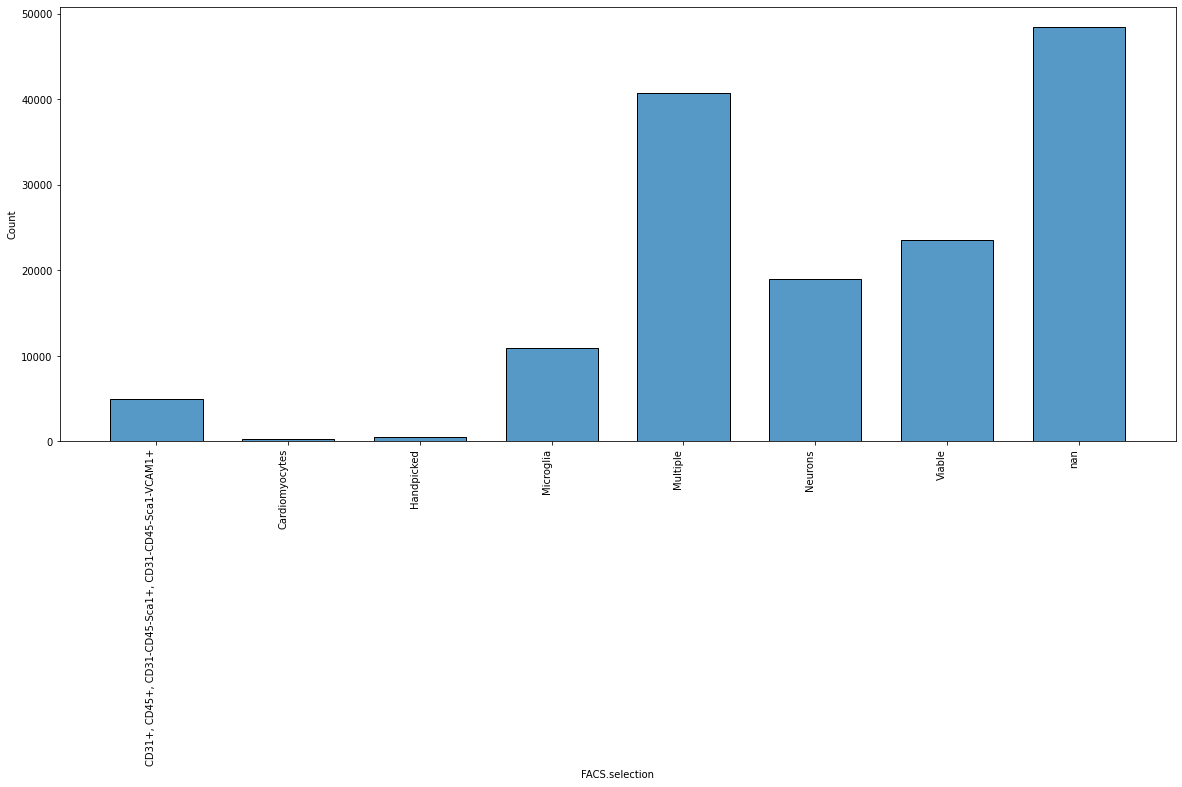

---- age ----

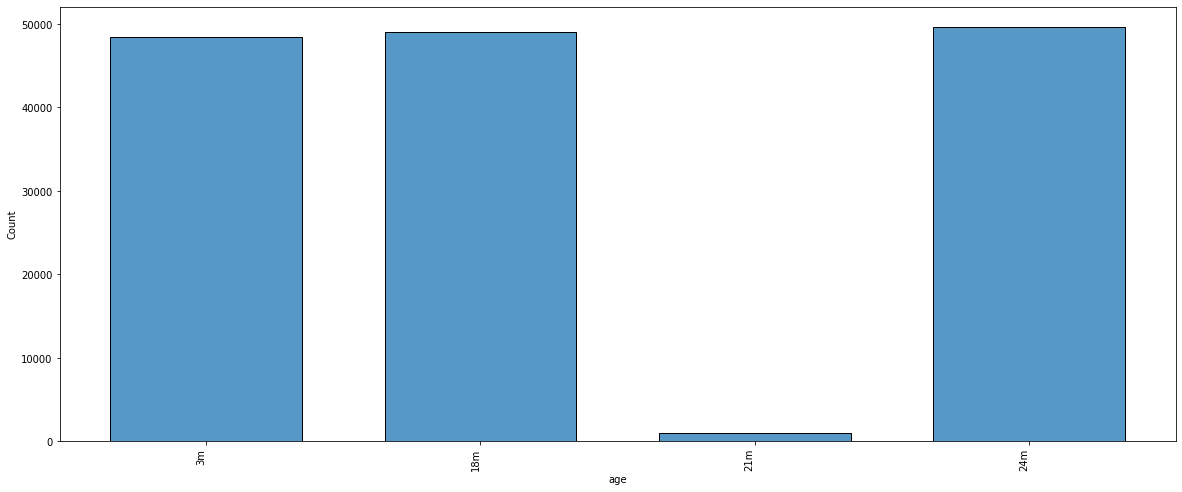

---- batch ----

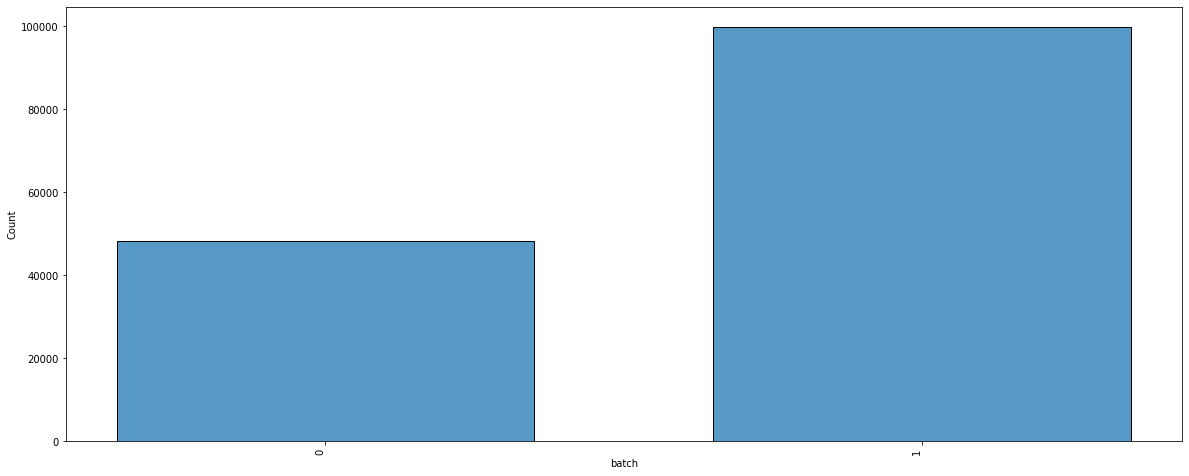

---- cell ----

cell is skipped.


---- cell_ontology_class ----

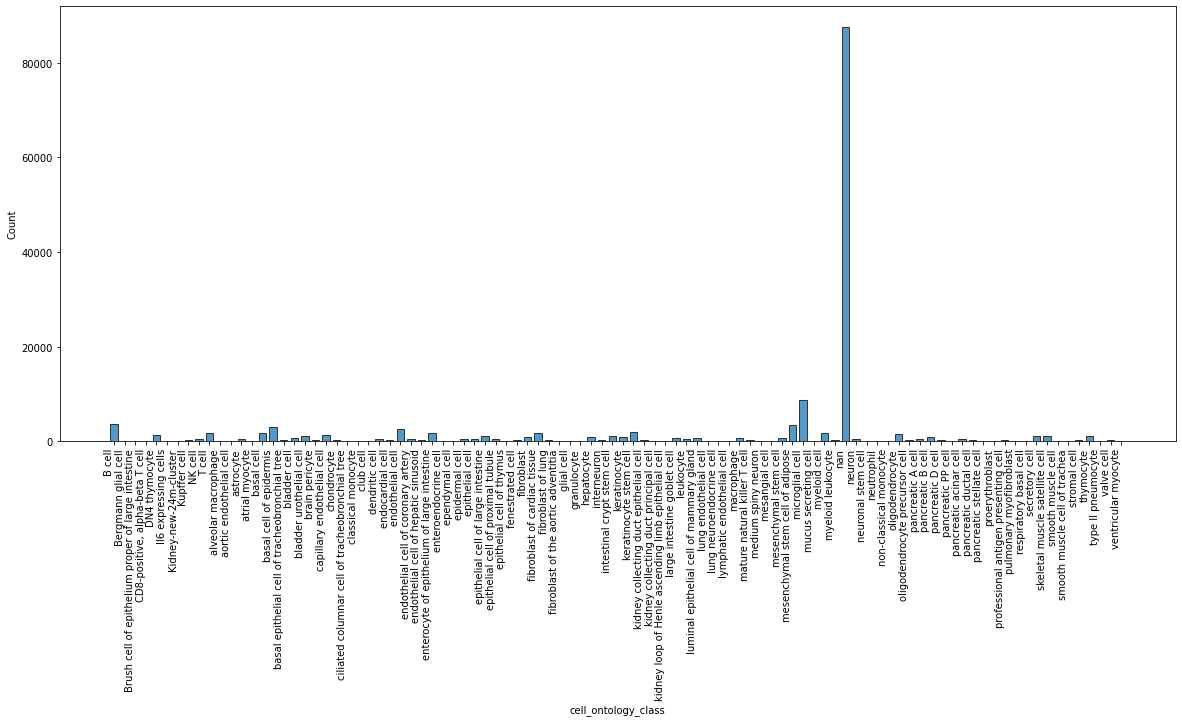

---- cell_ontology_id ----

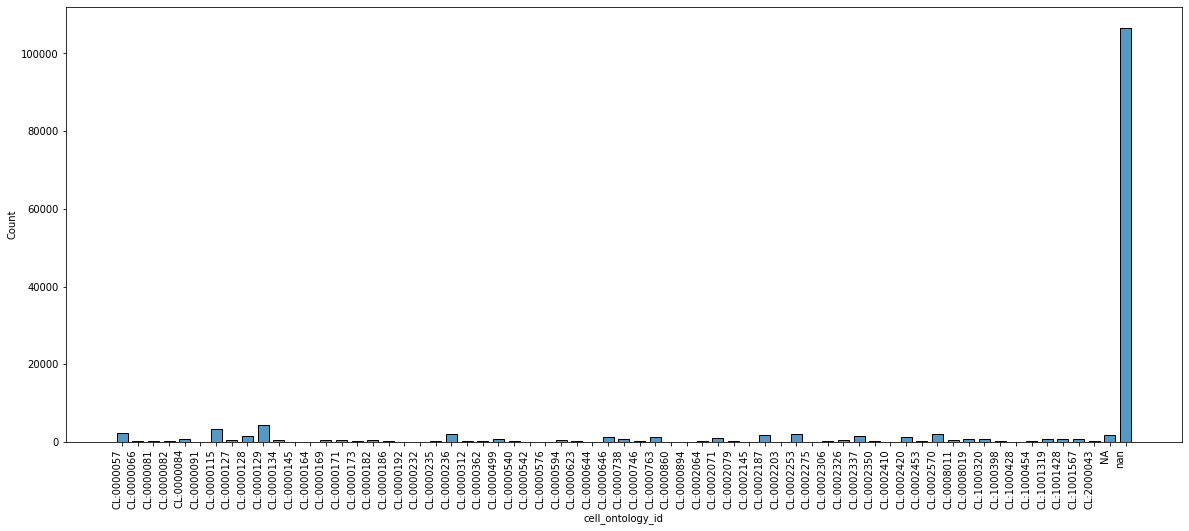

---- cellid ----

cellid is skipped.


---- free_annotation ----

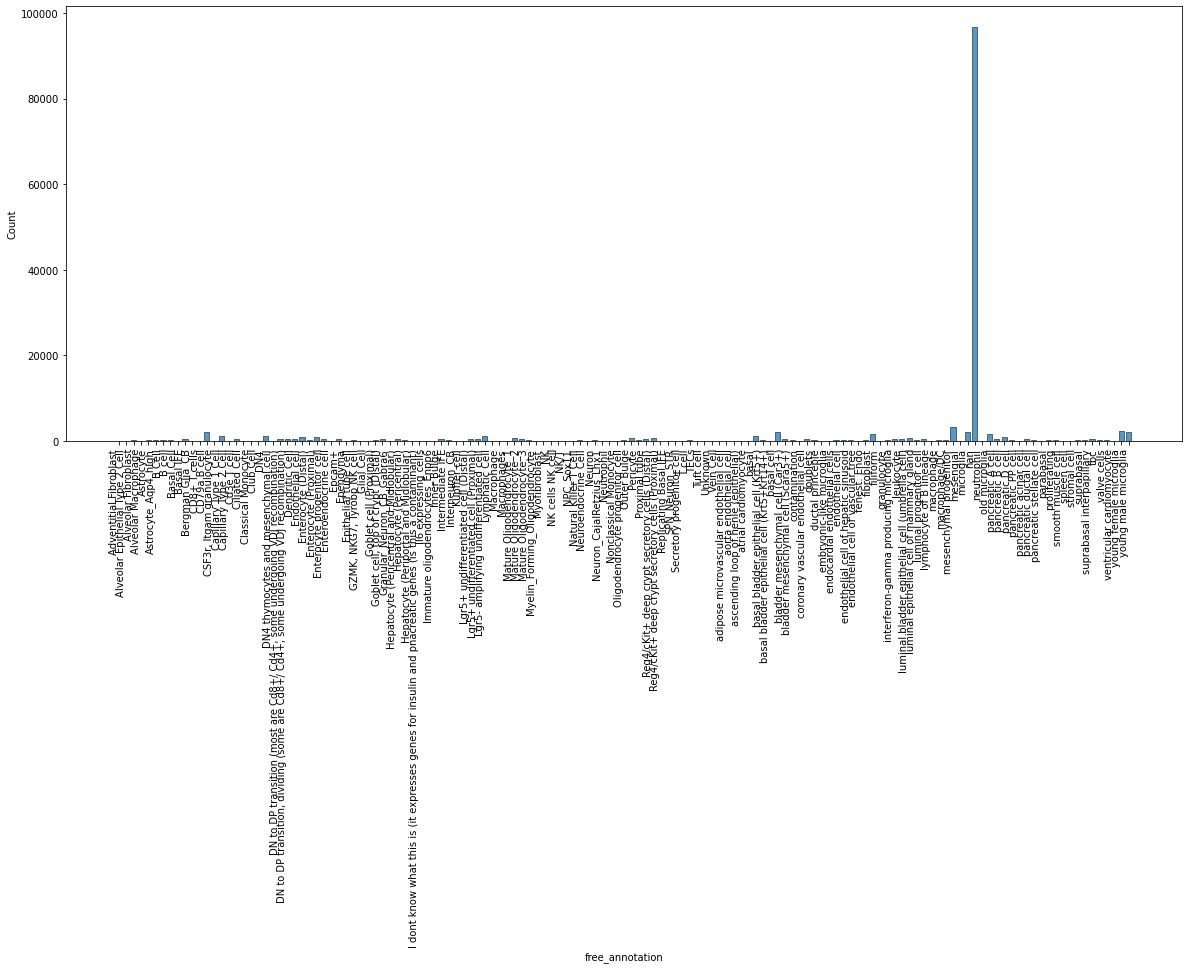

---- method ----

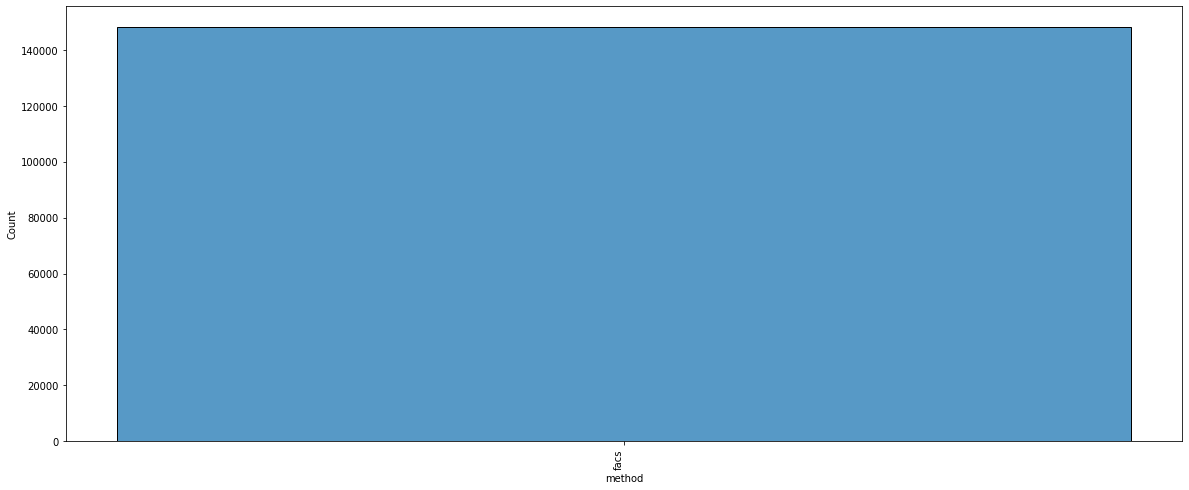

---- mouse.id ----

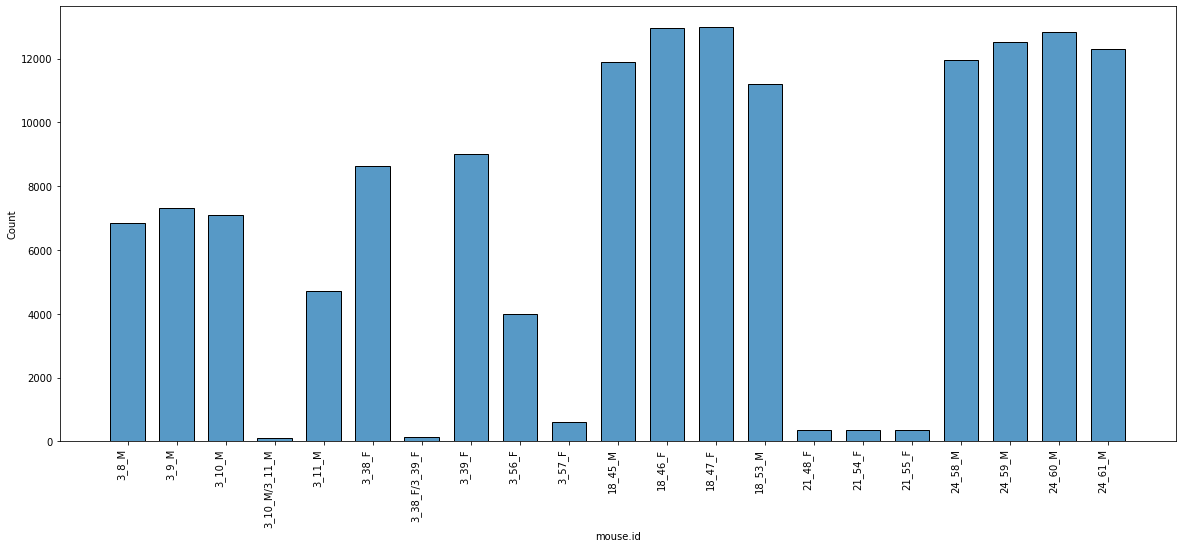

---- plate ----

plate is skipped.


---- sex ----

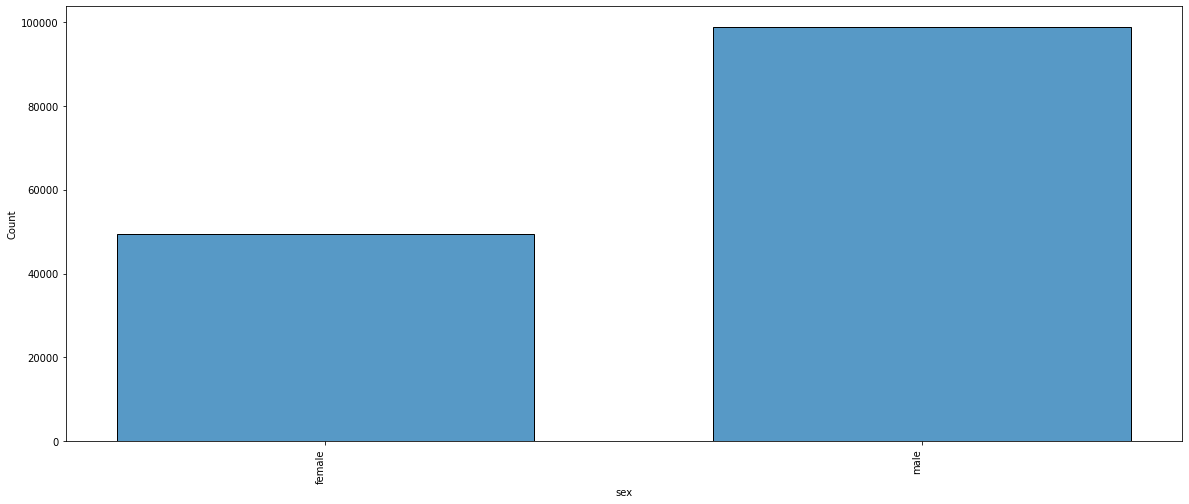

---- subtissue ----

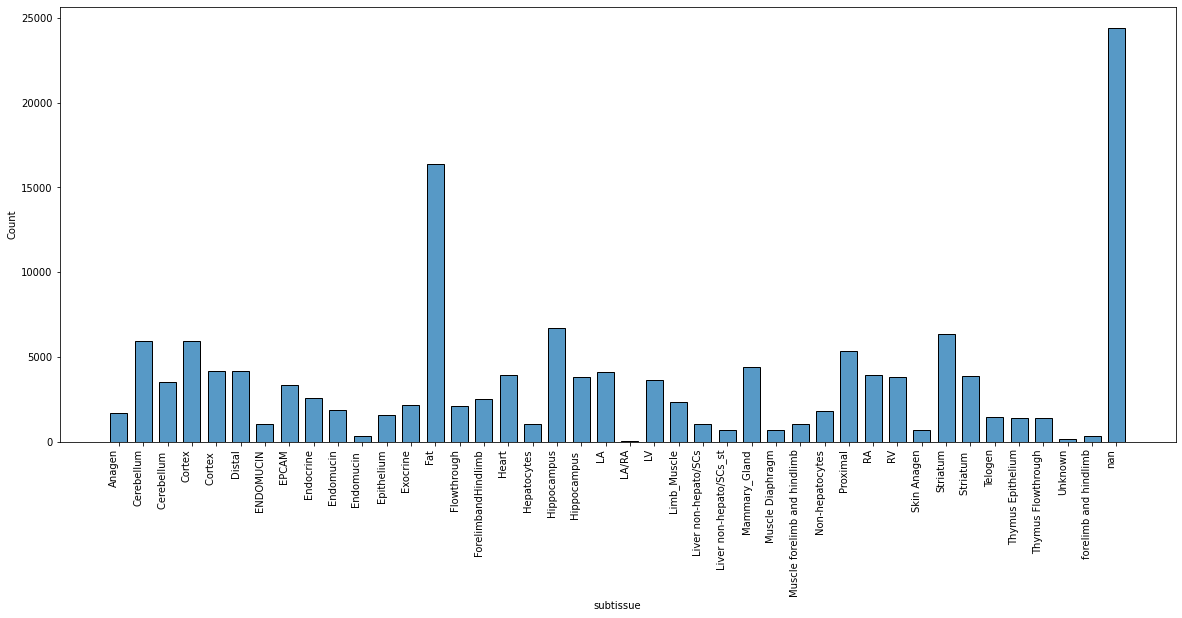

---- tissue ----

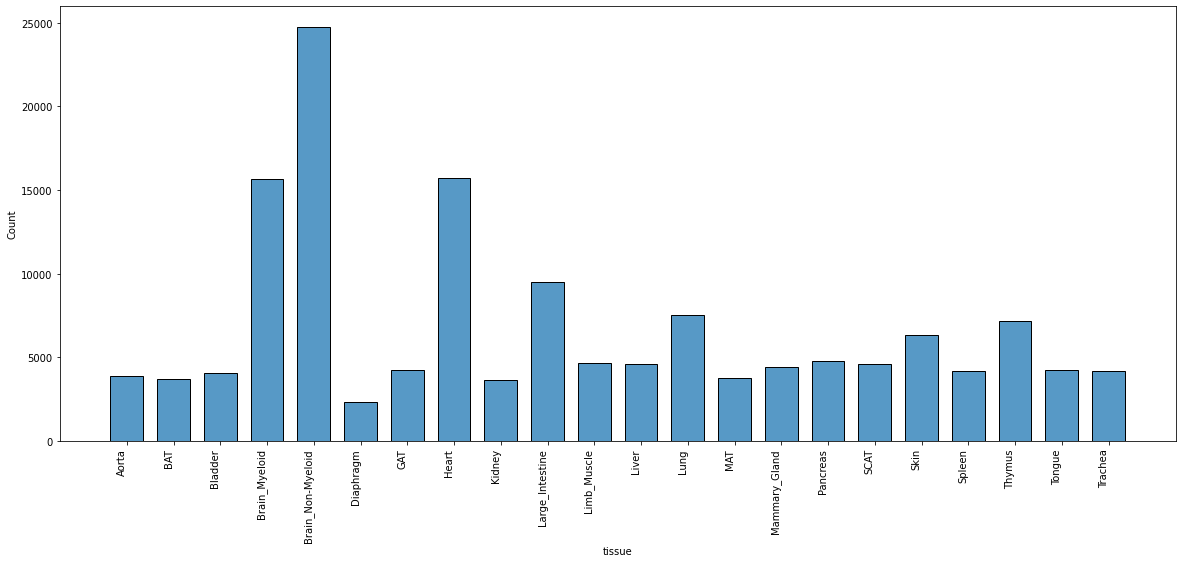

---- well ----

well is skipped.


---- cell_ontology_class_reannotated ----

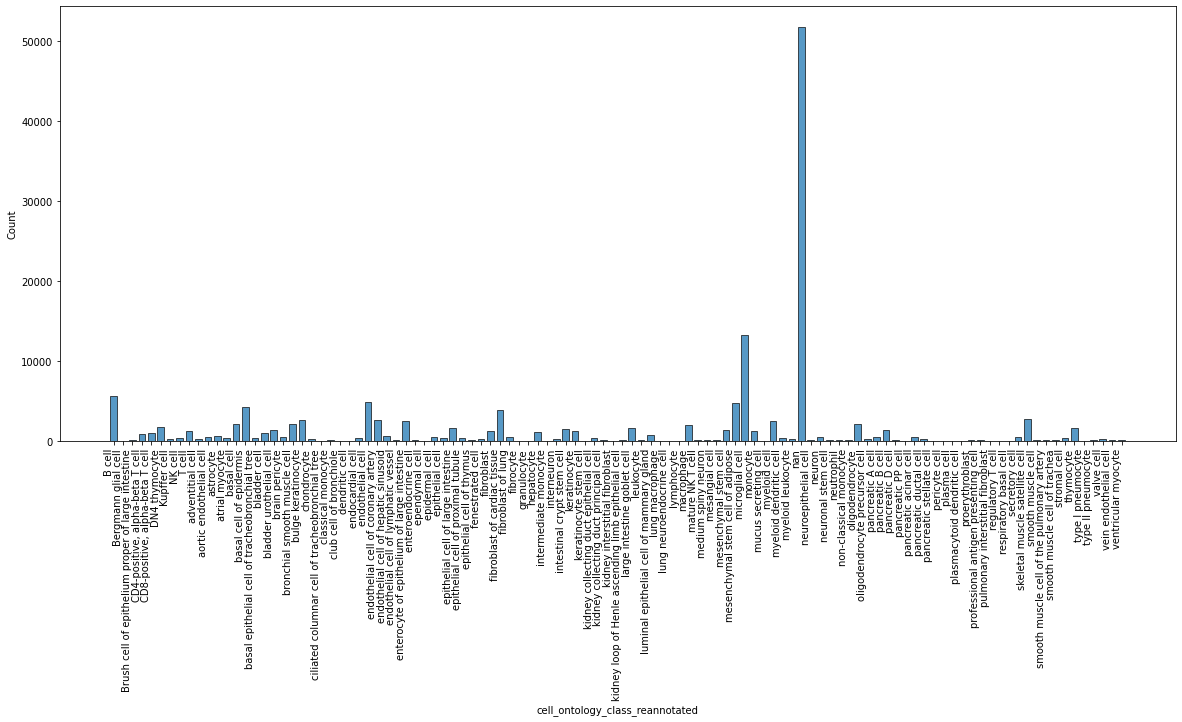

---- free_annotation_reannotated ----

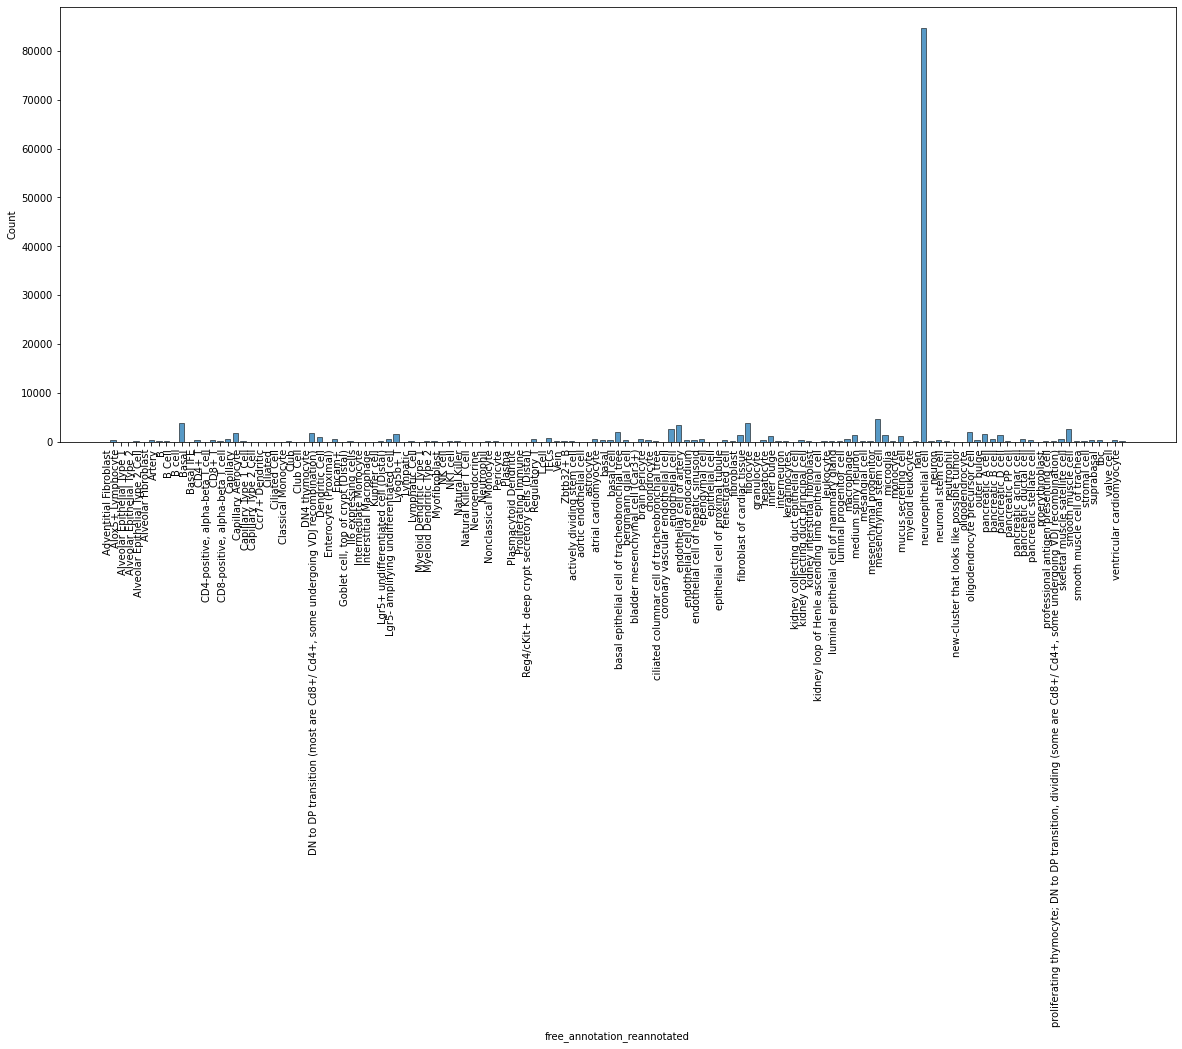

In [14]:
for i in tubula_muris_h5ad.obs.columns:
    rprint(f'---- {i} ----')
    num_unique = tubula_muris_h5ad.obs[i].unique().shape[0]
    if num_unique > 200:
        print(f'{i} is skipped.')
        continue
    f, ax = plt.subplots(figsize=(20, 8))
    sns.histplot(tubula_muris_h5ad.obs[i], shrink=0.7, ax=ax)
    plt.xticks(
        rotation=90,
        horizontalalignment='right',
    )
    plt.show()

In [34]:
X = tubula_muris_h5ad.X

In [71]:
DATA_DIR = '/home/tiankang/wusuowei/data/single_cell/MARS/Tabula_Muris/'

In [32]:
X = tubula_muris_h5ad.X.copy()
ss.save_npz(DATA_DIR + 'count.npz', X)

In [35]:
tubula_muris_h5ad.obs.to_csv(DATA_DIR + 'label.csv')

In [126]:
pipeline = importlib.reload(pipeline)

(148116, 23341)
(118926, 22804)
Median: 474840.0


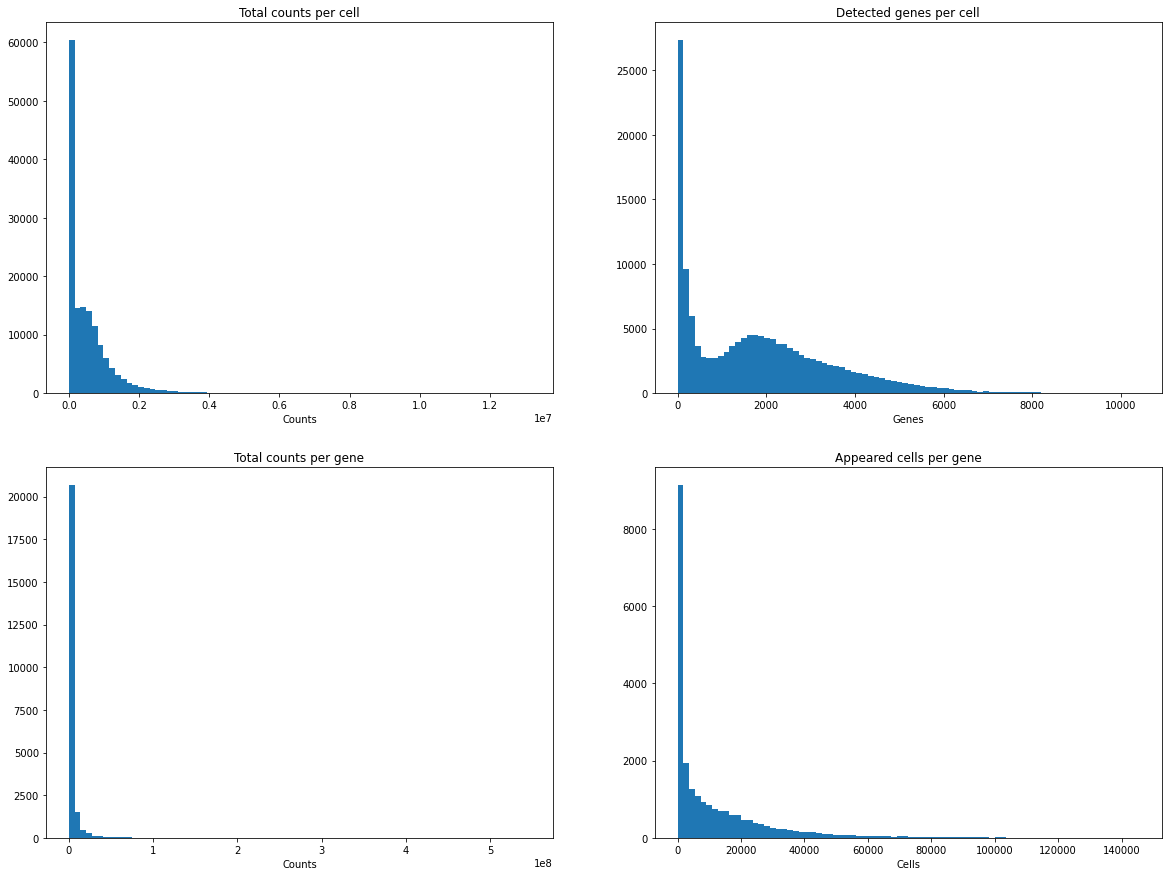

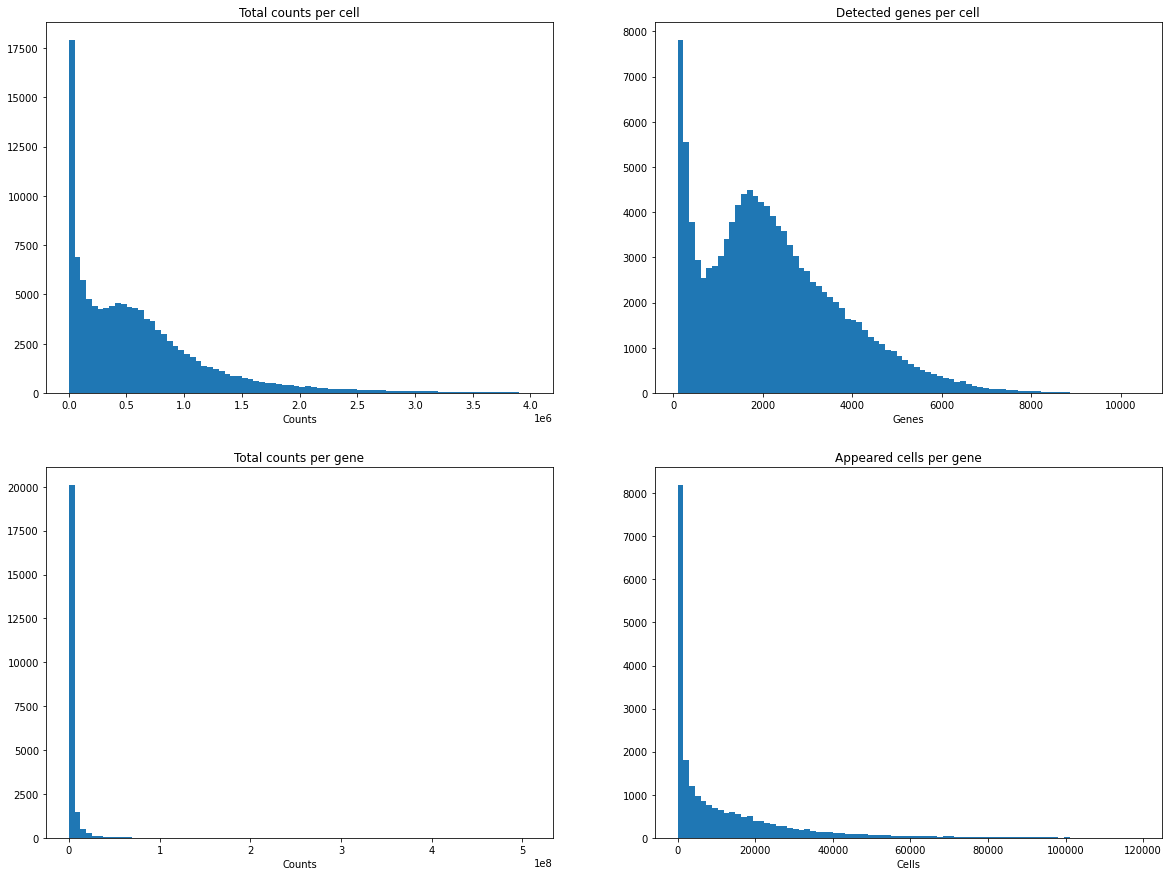

In [52]:
X_normalized, labels = pipeline.normalize(
    X,
    tubula_muris_h5ad.obs.cell_ontology_class_reannotated,
    clip_q=99,
    gene_min_cells=50,
    gene_min_counts=100,
    cell_min_genes=100,
    cell_min_counts=1000,
    cell_max_counts=4_000_000,
    logic='mine',
    plot=True,
    preqc_path='./explore/imgs/Tubula_Muris_preqc.jpg',
    postqc_path='./explore/imgs/Tubula_Muris_postqc.jpg',
)

In [75]:
labels.isin(labels.value_counts()[labels.value_counts() > 200].index.tolist()[1:]).sum()

91486

In [81]:
labels.value_counts()[labels.value_counts() <= 200].sum()

4260

In [86]:
indices = np.random.choice(
    np.arange(X_normalized.shape[0])[
        labels.isin(
            labels.value_counts()[labels.value_counts() > 200].index.tolist()[1:]
        )
    ],
    replace=False,
    size=15000
)

In [97]:
mask = np.zeros(X_normalized.shape[0], dtype=bool)
mask[indices] = 1

In [127]:
ids, labels_to_ids_dict = pipeline.labels_to_ids(labels)

In [128]:
with open(DATA_DIR + 'label_ids.txt', 'w') as f:
    for k, v in labels_to_ids_dict.items():
        print(k, v, sep='\t', file=f)

In [129]:
np.save(DATA_DIR + 'val/labels.npy', ids[mask])
np.save(DATA_DIR + 'train/labels.npy', ids[~mask])

In [107]:
ss.save_npz(DATA_DIR + 'val/data.npz', X_normalized[mask])

ss.save_npz(DATA_DIR + 'train/data.npz', X_normalized[~mask])
np.save(DATA_DIR + 'train/labels.npy', labels[~mask])

/home/tiankang/software/anaconda3/lib/python3.8/site-packages/numpy/lib/format.py:350: UserWarning: metadata on a dtype may be saved or ignored, but will raise if saved when read. Use another form of storage.
  d['descr'] = dtype_to_descr(array.dtype)


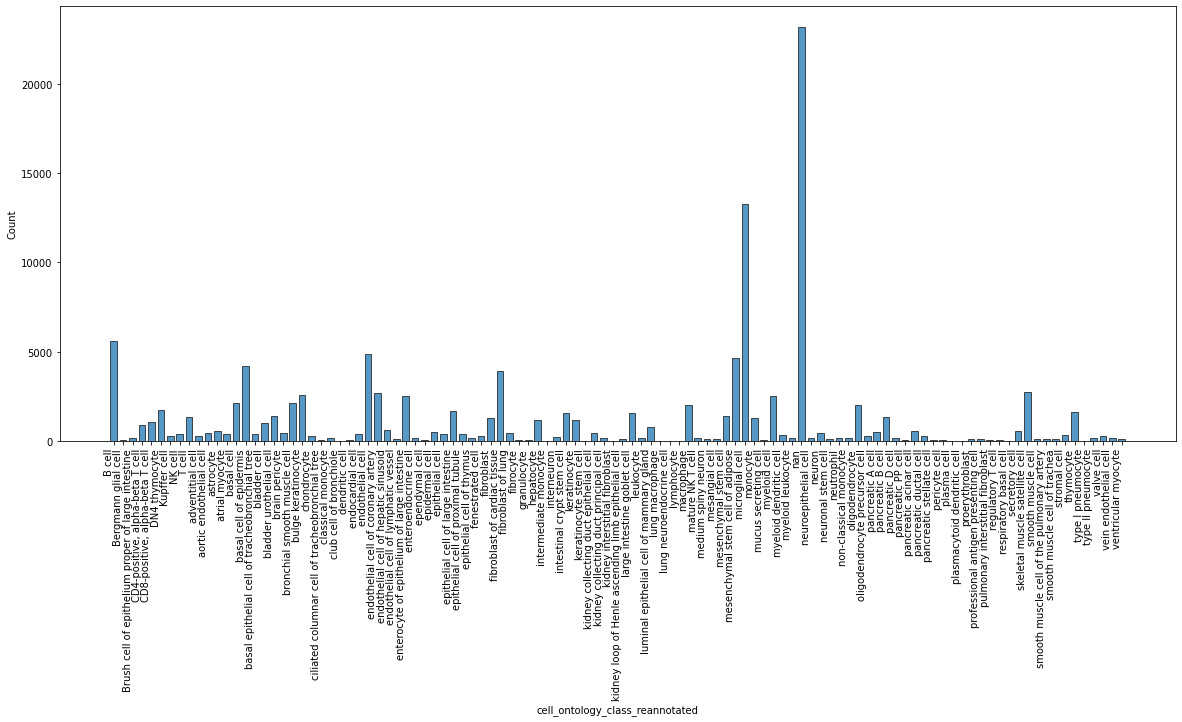

In [60]:
f, ax = plt.subplots(figsize=(20, 8))
sns.histplot(labels, shrink=0.7, ax=ax)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
)
None

In [90]:
np.save('./explore/cached/Tubula_Muris_umap.npy', X_umap)

In [16]:
umap_object, X_umap = pipeline.umap(X_normalized, n_components=3, n_neighbors=50)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-16-e4acc4a5a3ae>:1 in <module>                                             │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'X_normalized' is not defined

In [7]:
X_umap = np.load('./explore/cached/Tubula_Muris_umap.npy')

In [ ]:
fig = pipeline.plot(
    X_umap,
    labels=pipeline.label_to_idx(tubula_muris_h5ad.obs.cell_ontology_class_reannotated)[0],
    backend='plotly')
fig